In [1]:
import requests
import lxml.html as lh
import pandas as pd
from bs4 import BeautifulSoup

In [3]:
data = []
count = 1
for year in range(1980,2020):
    website_url = requests.get('https://www.basketball-reference.com/leagues/NBA_'+str(year)+'_per_game.html')
    soup = BeautifulSoup(website_url.content,'lxml')
    soup.prettify()
    My_table = soup.find('table',{'id':"per_game_stats"})
    tabledata = My_table.findAll('td')
    for cell in tabledata:
        count = count+1
        if (count%29 == 2):
            data.append(str(year))
        data.append(cell.get_text())

In [4]:
import numpy as np
data2 = np.array(data)
refined = np.reshape(data2, (-1, 30))

In [5]:
tableheader = My_table.findAll('th')
headers = []
count = 0
for item in tableheader:
    if (count < 30):
        headers.append(item.get_text())
        count=count+1
headers.remove('Rk')
headers = ['Year'] + headers
print(headers)

['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']


In [6]:
import pandas as pd
df1 = pd.DataFrame(refined, columns=headers)
df1.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1980,Kareem Abdul-Jabbar*,C,32,LAL,82,,38.3,10.2,16.9,...,.765,2.3,8.5,10.8,4.5,1.0,3.4,3.6,2.6,24.8
1,1980,Tom Abernethy,PF,25,GSW,67,,18.2,2.3,4.7,...,.683,0.9,1.9,2.9,1.3,0.5,0.2,0.6,1.8,5.4
2,1980,Alvan Adams,C,25,PHO,75,,28.9,6.2,11.7,...,.797,2.1,6.0,8.1,4.3,1.4,0.7,2.9,3.2,14.9
3,1980,Tiny Archibald*,PG,31,BOS,80,80,35.8,4.8,9.9,...,.830,0.7,1.7,2.5,8.4,1.3,0.1,3.0,2.7,14.1
4,1980,Dennis Awtrey,C,31,CHI,26,,21.5,1.0,2.3,...,.640,1.1,3.3,4.4,1.5,0.5,0.6,1.0,2.5,3.3


In [28]:
df1 = df1.drop_duplicates(subset='Player', keep='first')
df1.head()
df2=df1[(round(len(df1)*.5 - 1)):]
df2 = df2.dropna()
df2.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
8503,1999,Kelly McCarty,SG,23,DEN,2,0,2.0,1.0,1.5,...,,1.0,0.5,1.5,0.0,0.0,0.0,1.0,0.0,2.0
8506,1999,Jelani McCoy,C,21,SEA,26,0,12.7,2.2,2.9,...,.500,1.0,2.0,3.0,0.2,0.4,0.8,0.4,1.6,5.1
8513,1999,Roshown McLeod,SF,23,ATL,34,0,10.2,1.8,4.8,...,.822,0.4,1.1,1.5,0.4,0.1,0.0,0.7,0.7,4.8
8518,1999,Brad Miller,C,22,CHH,38,0,12.3,2.1,3.6,...,.794,0.9,2.2,3.1,0.6,0.2,0.5,0.8,1.7,6.3
8525,1999,Cuttino Mobley,PG,23,HOU,49,37,29.7,3.5,8.3,...,.818,0.4,1.8,2.3,2.5,0.9,0.5,1.6,2.0,9.9


In [30]:
df3 = df2.set_index('Player')

In [32]:
df3.to_csv('RookieStatLog.csv')

In [ ]:
#Look at positional trends too

In [33]:
df2 = df2.drop(['Player','Pos','Tm'], axis=1)

In [35]:
df2 = df2.set_index('Year')

In [36]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
cols = df2.columns
sc2 = StandardScaler()
for col in cols:
    df2[col] = pd.to_numeric(df2[col], errors='coerce')
    df2[[col]] = sc2.fit_transform(df2[[col]])

C:\Users\devi_\Anaconda3\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\devi_\Anaconda3\Anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\devi_\Anaconda3\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\devi_\Anaconda3\Anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\devi_\Anaconda3\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with 

In [37]:
df2 = df2.dropna()
df2 = df2.groupby(['Year']).mean()
df2.head()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Year,,,,,,,,,,,,,,,,,,,,,
1999,-0.105779,-0.227410,0.237523,0.330706,0.469245,0.473858,0.228616,0.403898,0.423817,0.159131,...,0.098479,0.308479,0.082179,0.167768,0.210390,0.628299,0.189205,0.588359,0.275763,0.543043
2000,0.027563,0.371841,0.232619,0.410160,0.404350,0.453744,-0.077441,-0.045910,0.037531,-0.273321,...,0.154164,0.255474,0.133930,0.187832,0.568927,0.469150,-0.110006,0.536418,0.291858,0.405625
2001,0.058028,0.330413,0.019433,0.136298,0.145125,0.172789,-0.083182,-0.209560,-0.245567,-0.237451,...,-0.029890,0.052830,-0.001154,0.020055,-0.041061,0.032812,-0.005348,0.139909,0.212511,0.120398
2002,-0.201450,0.223001,0.251314,0.219453,0.114625,0.174330,-0.165763,-0.103984,-0.057306,-0.344344,...,0.109893,0.180010,0.007038,0.066387,0.269881,0.271726,0.253356,0.209710,0.054110,0.118757
2003,0.146018,0.469209,0.293790,0.224469,0.169210,0.227178,-0.144355,-0.003307,0.013891,0.019757,...,0.162546,0.031575,0.041145,0.045122,0.152807,0.254913,0.017884,0.356996,0.227537,0.185937


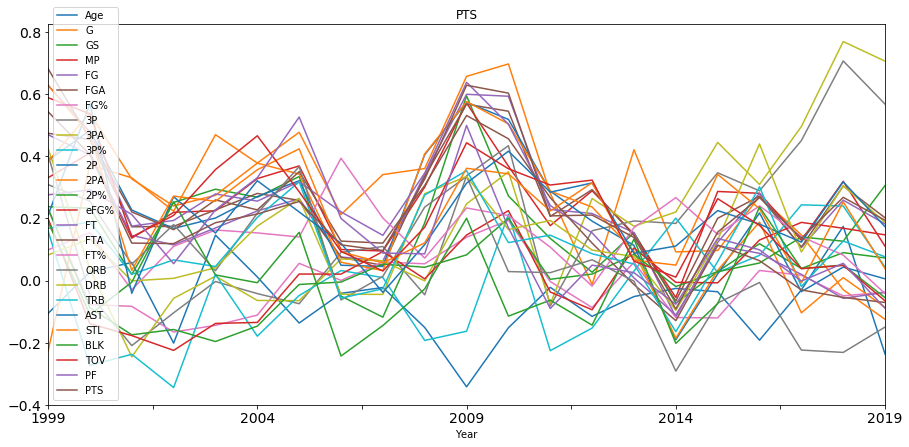

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
cols = df2.columns
for col in cols:
    df2[col].plot(figsize=(15,7), title= col, fontsize=14)
plt.legend(loc='lower left')
plt.show()